In [1]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from model_functions import *

import matplotlib.pyplot as plt

import math
from utils import *

nS = 500
nA = 2
seed = 2184109
gamma = .9
mu = np.ones(nS) * 1/nS
river = River(nS, mu, gamma=gamma, small=5, large=1000, seed=seed)
tau = 1
xi = np.ones(nS) * 1/nS
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)


In [2]:
alpha_tau = 0.0005
Qs = []
visit_distributions = []
taus = []
while tau < 1.00001 and tau > 0:
    Q_star = bellman_optimal_q(tmdp.P_mat_tau, tmdp.reward, tmdp.gamma)["Q"]
    pi = get_policy(Q_star)

    r_s_a_xi = compute_r_s_a(tmdp.xi, tmdp.reward)
    r_s_a_p = compute_r_s_a(tmdp.P_mat, tmdp.reward)
    r_s_a = compute_r_s_a(tmdp.P_mat_tau, tmdp.reward)

    d = compute_d(mu, tmdp.P_mat_tau, pi, tmdp.gamma)

    q_p = get_q_hat( tmdp.P_mat, r_s_a_p, tmdp.gamma, Q_star)
    q_xi = get_q_hat(tmdp.xi, r_s_a_xi, tmdp.gamma, Q_star)
    grad = compute_grad_j(pi, q_p, q_xi, d, tmdp.gamma)
    print("Gradient: ", grad)
    Qs.append(Q_star)
    visit_distributions.append(d)
    taus.append(tmdp.tau)
    tau = max(0, tau + alpha_tau * grad)
    print("Updating tau from {} to {}".format(tmdp.tau, tau))
    tmdp.update_tau(tau)
print("Moving to the original problem")
Q_star = bellman_optimal_q(tmdp.P_mat_tau, tmdp.reward, tmdp.gamma)["Q"]
pi = get_policy(Q_star)

r_s_a_xi = compute_r_s_a(tmdp.xi, tmdp.reward)
r_s_a_p = compute_r_s_a(tmdp.P_mat, tmdp.reward)
r_s_a = compute_r_s_a(tmdp.P_mat_tau, tmdp.reward)

d = compute_d(mu, tmdp.P_mat_tau, pi, tmdp.gamma)

q_p = get_q_hat( tmdp.P_mat, r_s_a_p, tmdp.gamma, Q_star)
q_xi = get_q_hat(tmdp.xi, r_s_a_xi, tmdp.gamma, Q_star)
grad = compute_grad_j(pi, q_p, q_xi, d, tmdp.gamma)
print("Gradient: ", grad)
Qs.append(Q_star)
visit_distributions.append(d)
taus.append(tmdp.tau)

Gradient:  -6.045418001309993
Updating tau from 1 to 0.996977290999345
Gradient:  -6.033174904722771
Updating tau from 0.996977290999345 to 0.9939607035469835
Gradient:  -6.020815425320194
Updating tau from 0.9939607035469835 to 0.9909502958343234
Gradient:  -6.008501840111202
Updating tau from 0.9909502958343234 to 0.9879460449142677
Gradient:  -5.9962341220465225
Updating tau from 0.9879460449142677 to 0.9849479278532445
Gradient:  -5.98401221172708
Updating tau from 0.9849479278532445 to 0.9819559217473809
Gradient:  -5.971836069578165
Updating tau from 0.9819559217473809 to 0.9789700037125918
Gradient:  -5.959705650090838
Updating tau from 0.9789700037125918 to 0.9759901508875464
Gradient:  -5.947620913271697
Updating tau from 0.9759901508875464 to 0.9730163404309106
Gradient:  -5.935581820699379
Updating tau from 0.9730163404309106 to 0.9700485495205609
Gradient:  -5.92358833079411
Updating tau from 0.9700485495205609 to 0.9670867553551638
Gradient:  -5.9116404077765
Updating tau 

In [3]:
metrics = compute_metrics(tmdp, Qs, Q_star, visit_distributions)


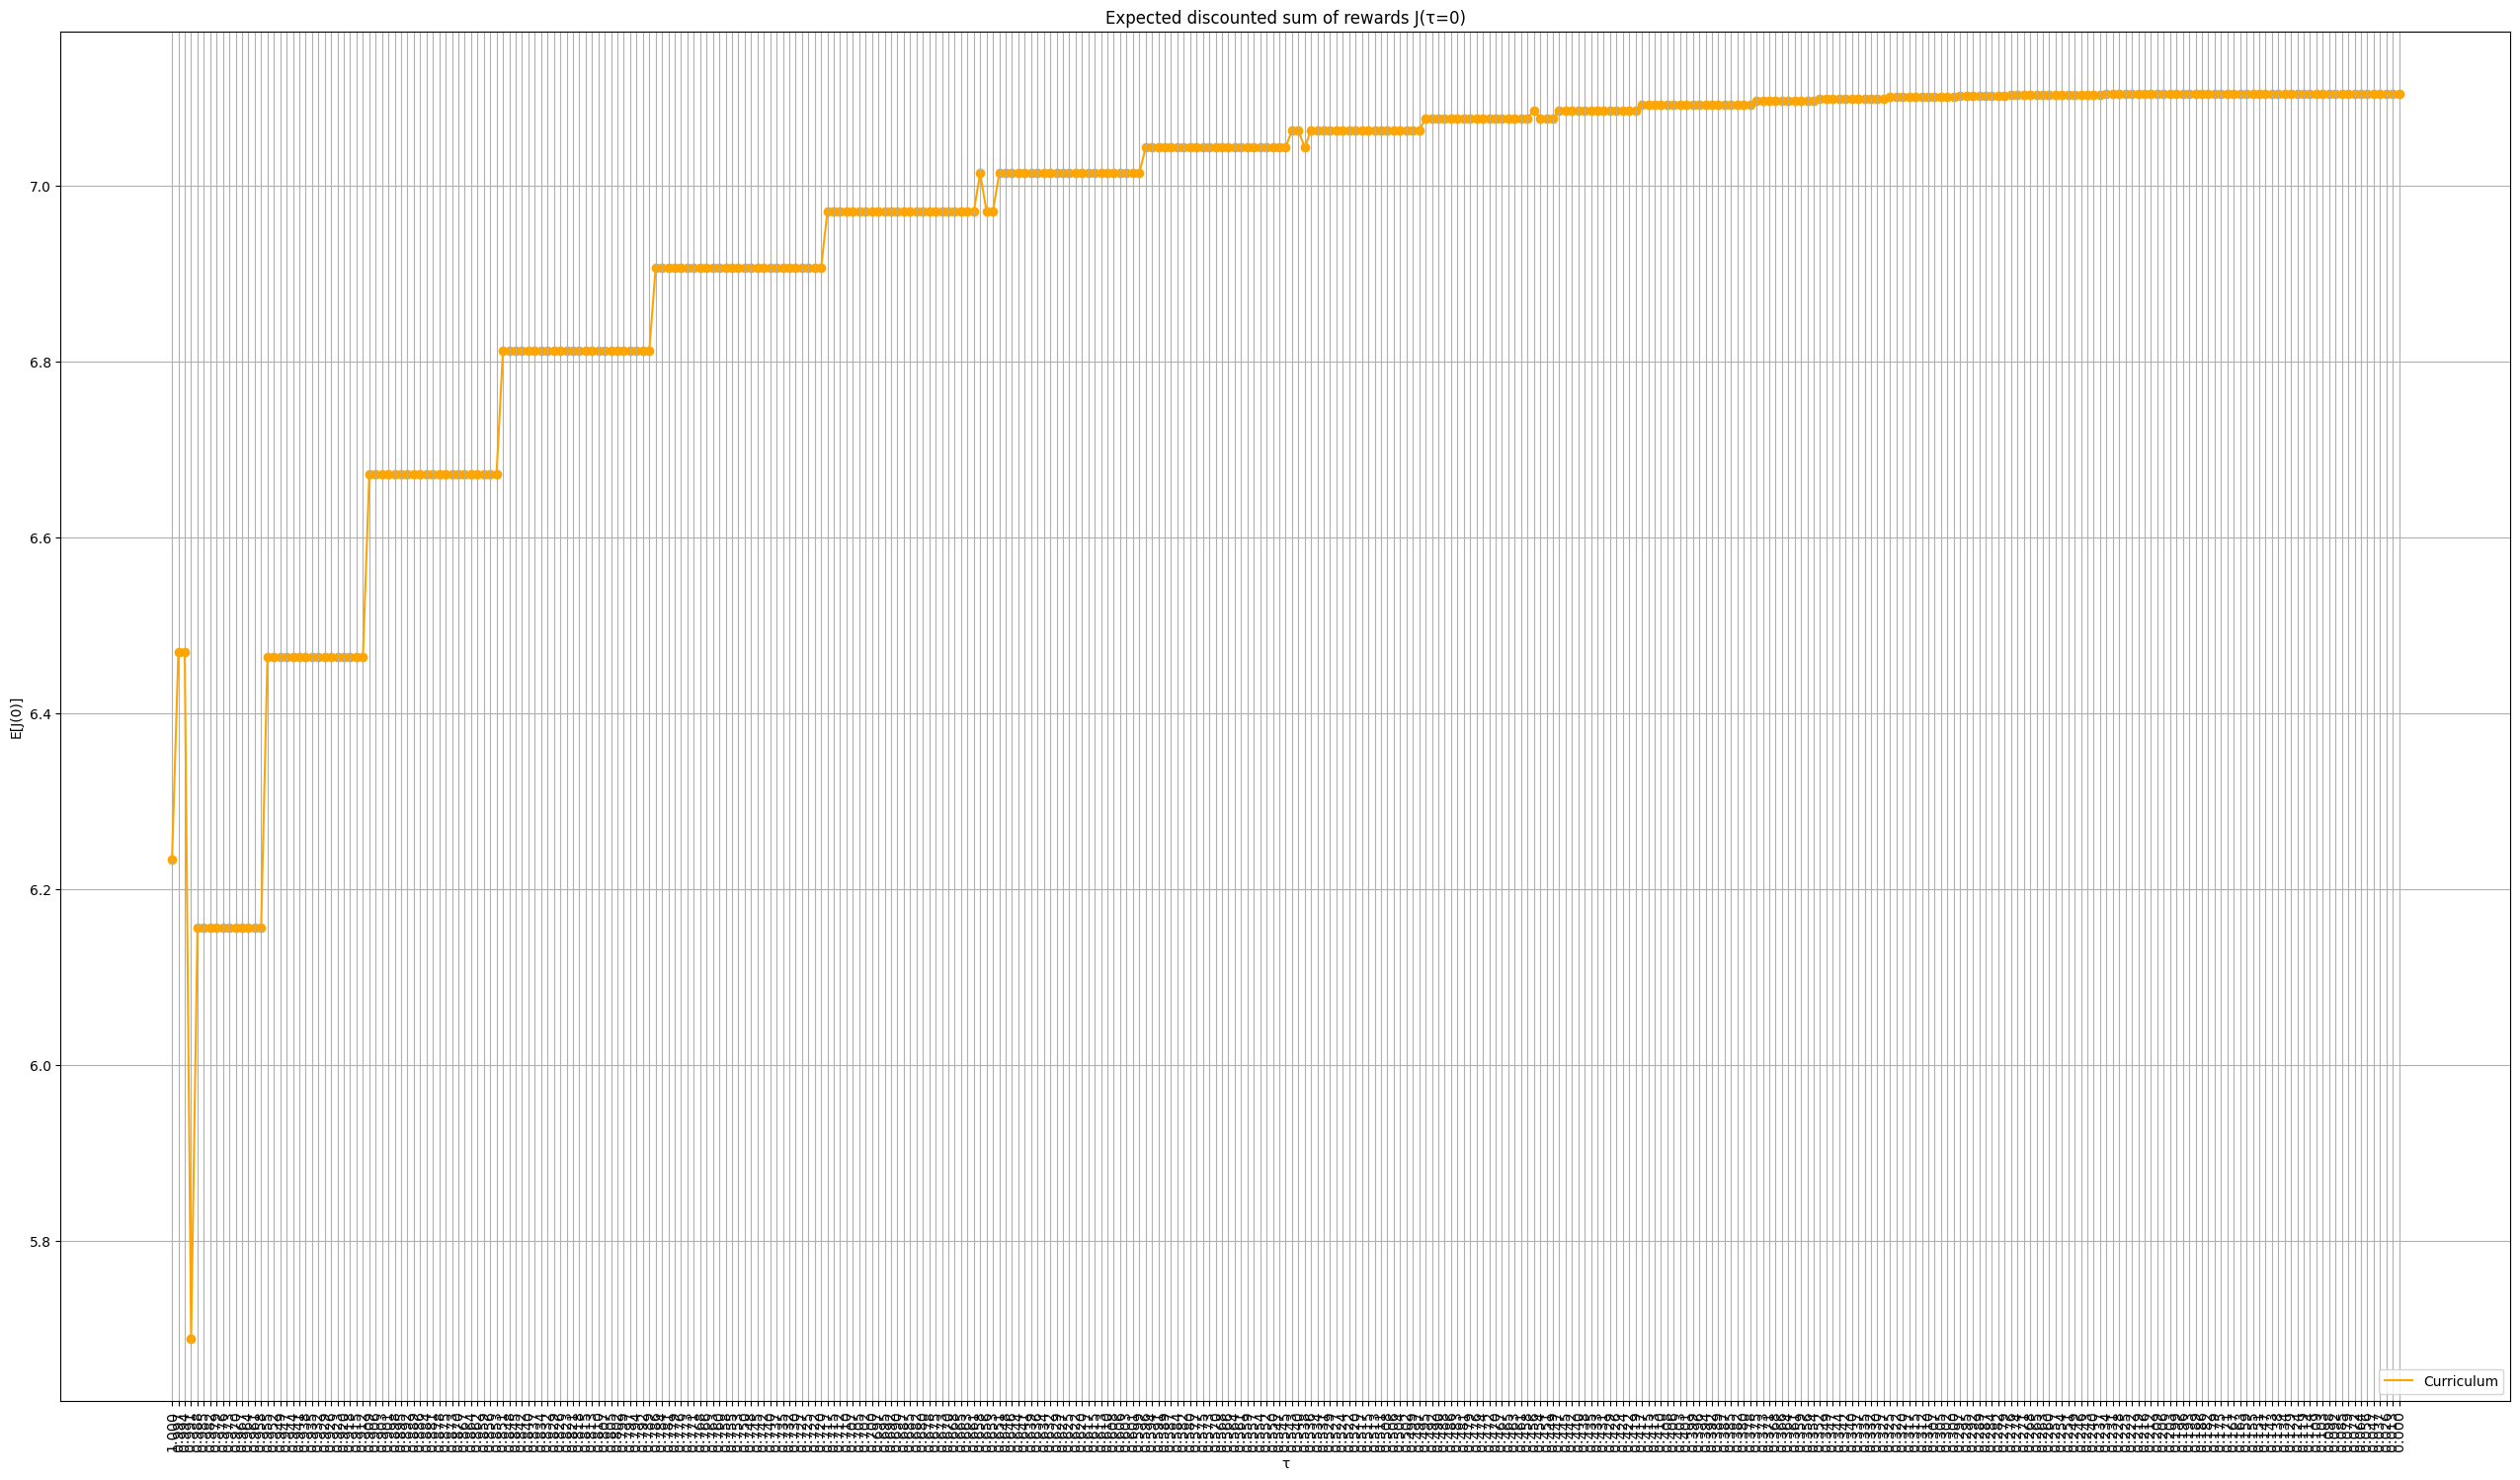

: 

In [6]:
x = np.array([])
y = np.array([])

for i, J in enumerate(metrics["J"]):
    
    if i < len(metrics["J"])-1:
        x = np.append(x, "{:.3f}".format(taus[i]))
        y = np.append(y, J)

x_map = np.array([i for i in range(len(x))])
plt.figure(figsize=(32,18))
plt.xticks(rotation=90, fontsize=10.3)
plt.scatter(x, y, c="orange")
plt.plot(x[:-1], y[:-1], c="orange", label="Curriculum")
plt.legend(loc="lower right")
plt.xlabel("τ")
plt.ylabel("E[J(0)]")
plt.title("Expected discounted sum of rewards J(τ=0)")
plt.grid(visible=True)

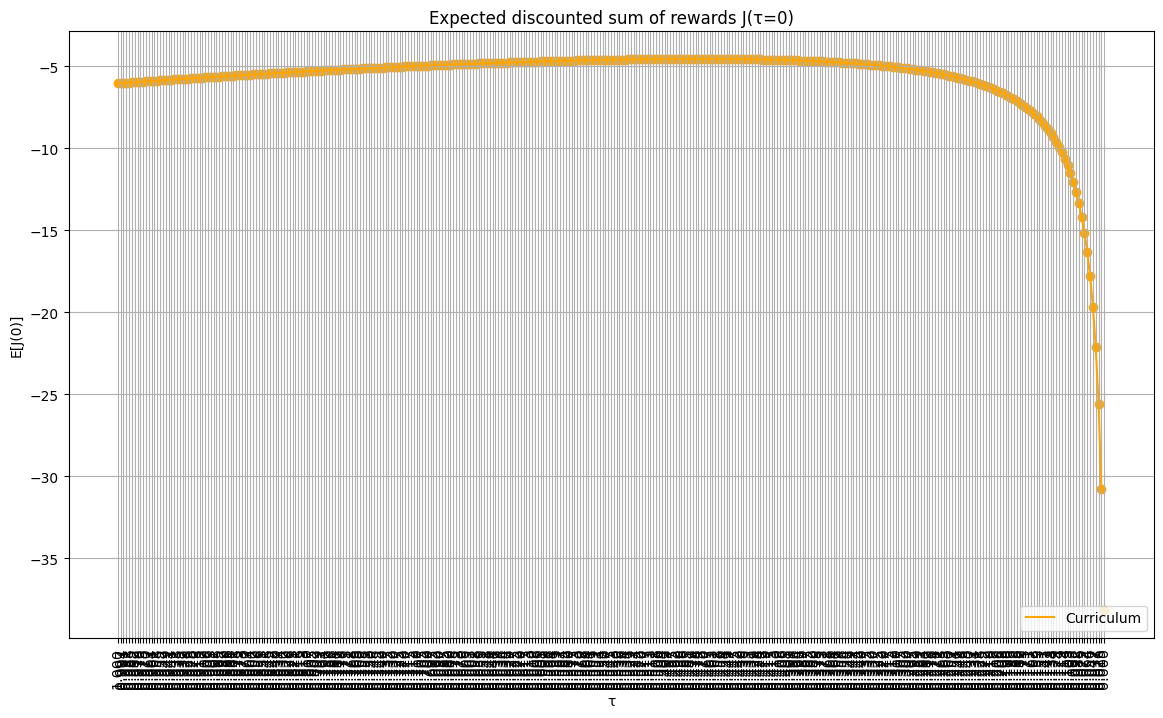

In [5]:
x = np.array([])
y = np.array([])

for i, J in enumerate(metrics["grad_J"]):
    if i < len(metrics["grad_J"])-1:
        x = np.append(x, "{:.3f}".format(taus[i]))
        y = np.append(y, J)

x_map = np.array([i for i in range(len(x))])
plt.figure(figsize=(14,7.875))
plt.xticks(rotation=90, fontsize=10.3)
plt.scatter(x, y, c="orange")
plt.plot(x[:-1], y[:-1], c="orange", label="Curriculum")
plt.legend(loc="lower right")
plt.xlabel("τ")
plt.ylabel("E[J(0)]")
plt.title("Expected discounted sum of rewards J(τ=0)")
plt.grid(visible=True)